<a href="https://colab.research.google.com/github/Mainakdeb/elegant-embryos/blob/main/explore_cell_movement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import shutil

# DRIVE_ROOT = "/content/drive/MyDrive/mydata/devolearn/"
plt.rcParams['figure.figsize'] =10, 10

In [55]:
#download data
!wget https://epic.gs.washington.edu/csv/CD20080412_ama-1_3A3_5.csv

--2021-03-10 13:10:48--  https://epic.gs.washington.edu/csv/CD20080412_ama-1_3A3_5.csv
Resolving epic.gs.washington.edu (epic.gs.washington.edu)... 128.208.9.147
Connecting to epic.gs.washington.edu (epic.gs.washington.edu)|128.208.9.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1288229 (1.2M) [text/csv]
Saving to: ‘CD20080412_ama-1_3A3_5.csv.2’

CD20080412_ama-1_3A 100%[===================>]   1.23M  1.21MB/s    in 1.0s    

2021-03-10 13:10:49 (1.21 MB/s) - ‘CD20080412_ama-1_3A3_5.csv.2’ saved [1288229/1288229]



In [56]:
df = pd.read_csv("CD20080412_ama-1_3A3_5.csv")
df.head(4)

,cellTime,cell,time,none,global,local,blot,cross,z,x,y,size,gweight
0,P0:1,P0,1,28481,3481,2216,2216,3481,13.1,402,275,92,4324237
1,P0:2,P0,2,25411,411,-112,-112,411,13.1,390,267,50,919174
2,P0:3,P0,3,23515,-1485,-1069,-1069,-1485,14.0,410,261,50,992425
3,AB:4,AB,4,24598,-402,-3,-3,-402,14.1,386,250,40,491859


In [57]:
def trace_movement_2d(cellname):
    trace = df[df.cell.isin([cellname])]
    x = trace.x.values
    y = trace.y.values
    t = trace.time.values
    return x, y, t

def put_text(x,y,t, plt):
    for i in range (len(x)):
        plt.text(x[i], y[i], t[i], fontsize = 10)
    return plt

def plot_movement_2d(cell_names_list = [], text=False, legend=False):
    
    traces = []
    f, ax = plt.subplots(figsize= (21,15))
    for cellname in cell_names_list:
        x,y,t =  trace_movement_2d(cellname)
        traces.append([x,y,t])

    for i in range(len(traces)):
        ax.plot(traces[i][0], traces[i][1], "o-", label = cell_names_list[i])

    if text:    
      for i in range(len(traces)):
          ax = put_text( traces[i][0], traces[i][1], traces[i][2], ax)
    if legend:    
      ax.legend(fontsize = 20)
    ax.grid()


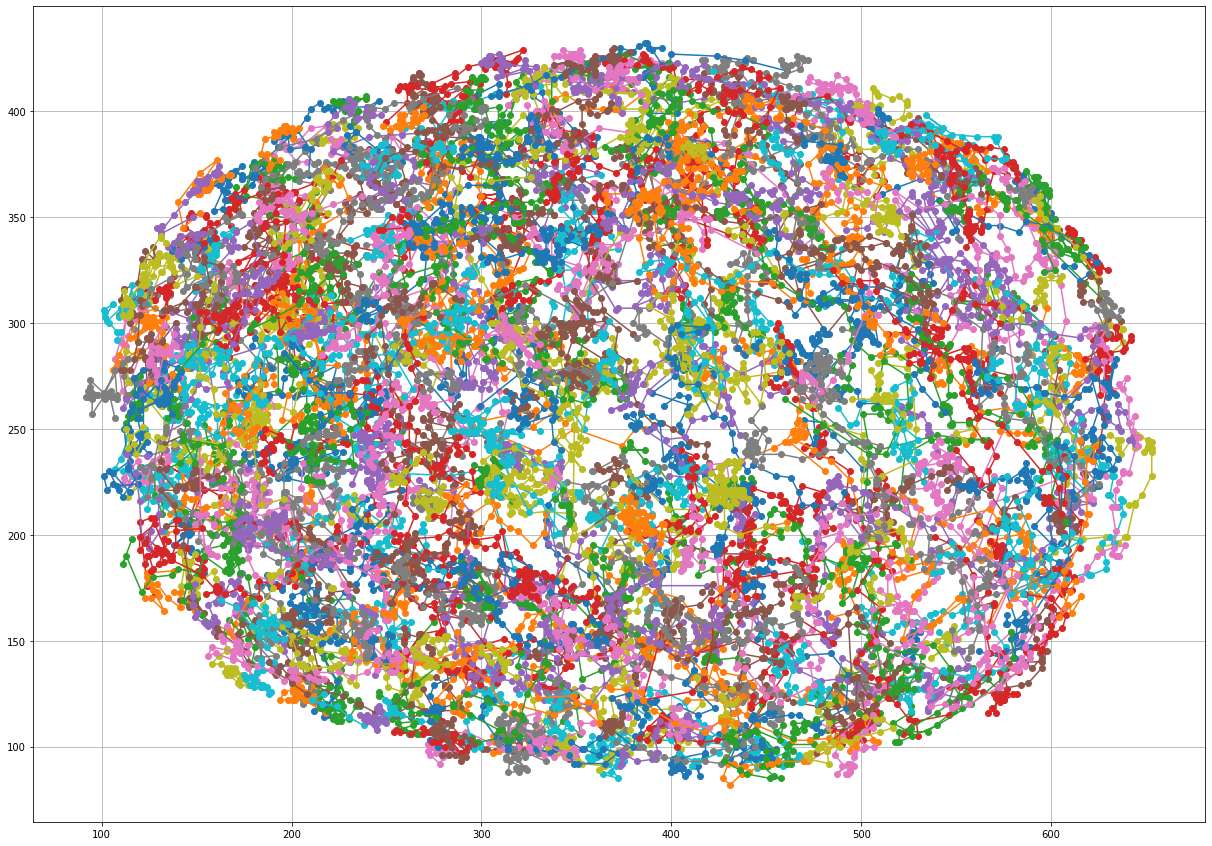

In [58]:
plot_movement_2d(cell_names_list =list(df.cell.unique()), text=False, legend=False)                                 

In [59]:
def trace_movement_3d(cellname):
    trace = df[df.cell.isin([cellname])]
    x = trace.x.values
    y = trace.y.values
    z = trace.y.values
    t = trace.time.values
    return x, y, z, t


def plot_movement_3d(cell_names_list = [], text=False, legend=False):
    
    traces = []
    ax = plt.axes(projection="3d")

    for cellname in cell_names_list:
        x,y,z,t =  trace_movement_3d(cellname)
        traces.append([x,y,z,t])

    for i in range(len(traces)):
        ax.plot(traces[i][0], traces[i][1], "o-", label = cell_names_list[i])

    if text:    
      for i in range(len(traces)):
          ax = put_text( traces[i][0], traces[i][1], traces[i][2], ax)
          
    if legend:    
      ax.legend(fontsize = 20)
    ax.grid()



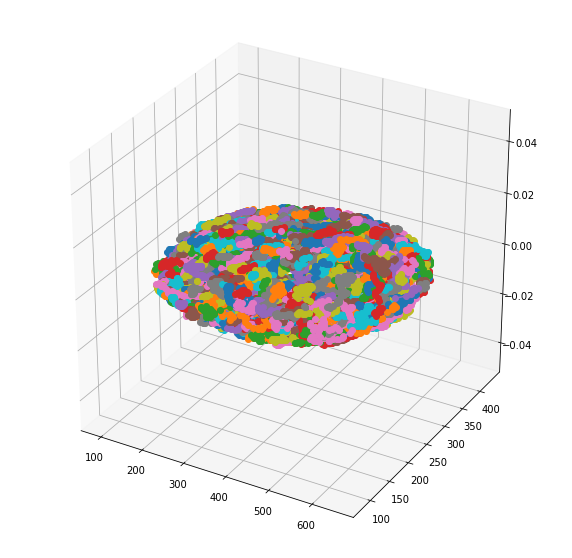

In [60]:
plot_movement_3d(cell_names_list =list(df.cell.unique())[:], text=False, legend=False)                                 